# Sistemas Dinámicos Unidimensionales

#### Puntos Fijos Bifurcaciones

###### Puntos fijos

Se dice que $\xi \in I $, es un punto fijo de f si $f(\xi)=\xi$ .

Se dice que $\xi$ es fijo si $f^{n+1}(\xi = f^{n})$ para cierto $n \in N$

Si la órbita de un punto converge a un punto $\xi$ , entonces $\xi$ es un punto fijo de f(esto debido a la continuidad de f)

Se dice que un punto fijo $\xi$ es atractivo si existe un intervalo abierto $U$ alrededor de $\xi$ tal que:

$$\lim_{n \rightarrow \infty} f^{n}(x)= \xi$$

Para todo $x \in U \cap I$

Al conjunto 

$$\left \{ x \in I| \lim_{n\rightarrow \infty} f^{n}(x)=\xi \right \}$$

Se le llama cuenca de atracción de $\xi$

###### Ejemplo 

0 es un punto fijo de 

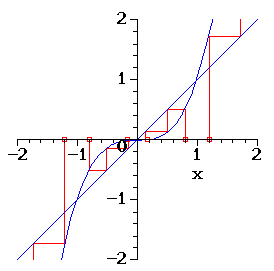



###### Teorema

Si $f \in C^{1}(I)$ y $|f(\xi)|<1$ entonces $\xi$ es un punto fijo atractivo.
En el caso de $f(\xi)=0$ se dice que $\xi$ es superatractivo.


La relación $|f(\xi)|=K<1$  proporciona además una estimación de la velocidad de convergencia de $f^{n}(x)$ a $\xi$ para puntos cercanos a $\xi$

Se dice que un punto fijo $\xi$  es repulsivo si existe un intervalo abierto $U$ alrededor de $\xi$ tal que para todo $x \in U \cap I- \left \{ \xi \right \}$ existe $k \in N$ tal que $f^{k}(x)\in U$

###### Ejemplo
El 0 es un punto fijo repulsivo de 
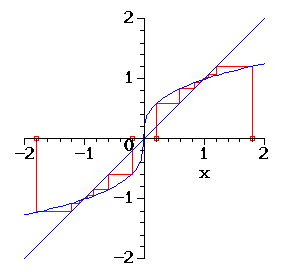

###### Teorema
Si $f \in C^{1}(I)$ y $|f(\xi)|>1$ entonces $\xi$ es un punto fijo repulsivo

Se dice que un punto fijo $\xi$ de $f$ es indiferente de $f \in C^{1}(I)$ y $|f(\xi)|=1$


###### Teorema
Si $f \in C^{1}(I)$ y $\xi$ es un punto fijo indiferente tal que $|f|$ presenta un máximo local en $\xi$, entonces $\xi$ es un punto fijo atractivo

###### Ejemplo
El 0 es un punto fijo indiferente atractivo de 

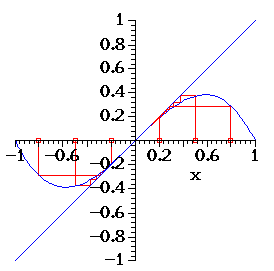

In [3]:
from pynamical import cobweb_plot

In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, IPython.display as IPdisplay, glob
from PIL import Image
%matplotlib inline

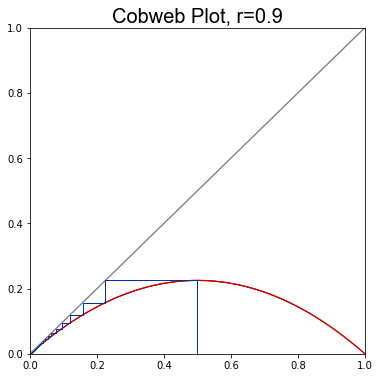

In [5]:
cobweb_plot(r=0.9)   ##Función logistica

###### Teorema
Si $f \in C^{1}(I)$ y $\xi$ es un punto fijo indiferente tal que $|f|$ presenta un mínimo local estricto en $\xi$, entonces $\xi$ es un punto fijo repulsivo

###### Ejemplo
El 0 es un punto fijo indiferente repulsivo de 
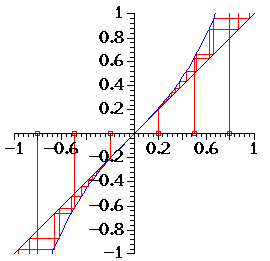

In [11]:
def lineal(c, x):
    return c * x 

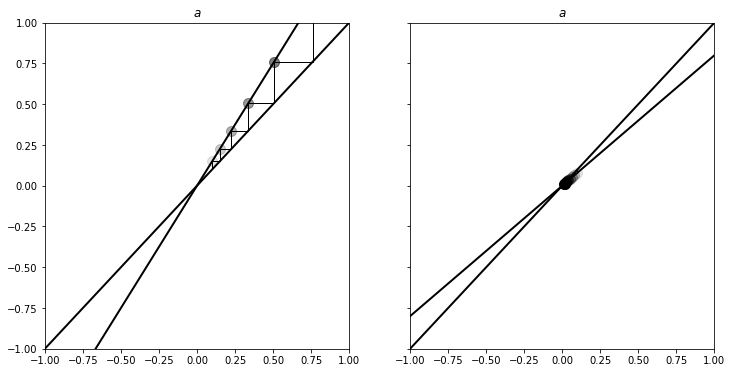

In [12]:
def plot_system1(a, x0, n, cx=None):    
   
    t = np.linspace(-1, 1)    #tomo un espacio 
    cx.plot(t, lineal(a, t), 'k', lw=2)
    cx.plot([-1, 1], [-1, 1], 'k', lw=2)     ##ploteo el tamaño

    # (x, x) -> (x, y)     Bifurcacion 
    # (x, y) -> (y, y)
    x = x0     #X0 mi condicion inicial
    for i in range(n):          ##Particiones en 100 , que muestran si convergen o divergen
        y = lineal(a, x)         # Lineas donde iran ubicadas 
        # Plot the two lines.
        cx.plot([x, x], [x, y], 'k', lw=1)
        cx.plot([x, y], [y, y], 'k', lw=1)
        
        cx.plot([x], [y], 'ok', ms=10,   #punto en la grafica
                alpha=(i + 1) / n)   
        x = y

    cx.set_xlim(-1, 1)
    cx.set_ylim(-1, 1)
    cx.set_title('$a$')


fig, (cx1, cx2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)   #ploteo mis graficas con tamaño 12*6 
plot_system1(1.5, .1, 10, cx=cx1)       #son dos sistemas diferentes, cuando mi r tiene valor inicial 
plot_system1(0.8, .1, 10, cx=cx2)

###### ¿Que ocurre si $|f(x)|<1$ , si x<$\xi$ y  $|f'(x)|>1$ ,  si x>$\xi$?

Los puntos fijos indiferentes son excepciones, ocurren en familias de aplicaciones

En la aplicacion que se producen hay bifurcaciones, es decir que cambia el comportamiento de los puntos fijos


Se dice que $\xi$ es un punto periódico de orden $k \in N$ tal que $f^{k}(\xi)=\xi$. 

Se llama de orden de $\xi$ al menor número natural k que cumpla la  condición anterior y se dice entonces que $\xi$ es un punto periódico de orden k.

Todos los puntos del ciclo son periodicos dado el orden k

$\xi$ es un punto periódico de orden $k \in n$ si y solo si es un punto fijo de $f^{k}$ (y no es punto fijo de $f^{i}$ para $i<k$).

Todos los puntos del ciclo son también puntos fijos atractivos (repulsivos) de $f^{k}$

La cuenca de atracción del ciclo coincide con el conjunto

$$\left \{ x \in I| \lim_{n\rightarrow \infty} (f^{k})^{n}(x) \right \} \in \left \{ \xi , f(\xi) , ...., f^{\left \{ k-1\right \}}(\xi)\right \} $$

###### Ejemplo 
El ciclo {-1,1} es un ciclo periódico atractivo de $f(x)=-x^{(1/3)}$

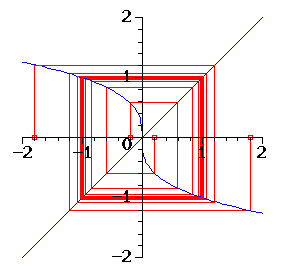


###### Ejemplo 
El ciclo {-1,1} es un ciclo periódico repulsivo de $f(x)=-x^{3}$
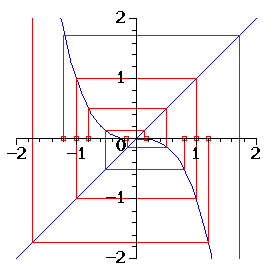

In [14]:
def logistic(r, x):
    return r * x * (1 - x)

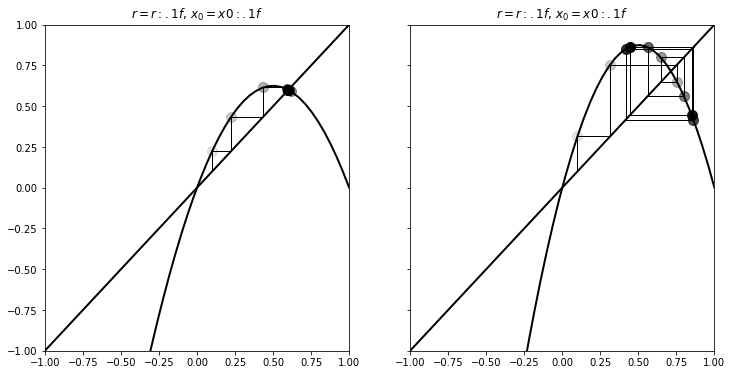

In [15]:
def plot_system(r, x0, n, ax=None):
    
    t = np.linspace(-1, 1) #Tomo un espacio 
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([-1, 1], [-1, 1], 'k', lw=2)  #Ploteo entre un cierto rango que necesito

    # Aplico recursividad y=f(x) and ploteo dos lineas:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0  #valor inicial
    for i in range(n):
        y = logistic(r, x)  #Llamoo la función logistica
        # Ploteo dos lineas.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Ploteo la posición con su incremento
        ax.plot([x], [y], 'ok', ms=10,  #El punto en la gra
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(-1, 1)  #Tamaño de la figura
    ax.set_ylim(-1, 1)
    ax.set_title('$r={r:.1f}, \, x_0={x0:.1f}$')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(2.5, .1, 10, ax=ax1)
plot_system(3.5, .1, 10, ax=ax2)


### El Teorema de Sarkovskii

##### Teorema de Li y Yorke. 
Sea $f: R \rightarrow R$ continua y supongamos que f tiene un punto periódico de periodo 3. Entonces f tiene puntos periódicos de todos los periodos.

##### Teorema de Sarkovskii.
Sea $f: R \rightarrow R$ continua y supongamos que f tiene un punto periódico de periodo  r. Entonces, para todo k>r según el orden 

$$3>5>7>.....>2*3>2*5>2*7>.....>4*3>4*5>4*7>.....>8>4>2>1$$

f tiene algún punto periódico de periodo k.



El teorema anterior es óptimo en el sentido de que si $n>k$ según la ordenación anterior, existen funciones con un k-ciclo que no tienen ningún n-ciclo.

